<h4></h4>

# <b>Task 1:</b> Data Collection & Initial Characterisation
<hr>

### <b>Firstly</b>, we need to read in the table from the webpage into a Pandas Dataframe

In [101]:
import pandas as pd

df_list = pd.read_html("http://mlg.ucd.ie/modules/COMP30760/assign2/19202103.html")

df = df_list[0]

df.head(50)

,Date of Sale,Price,Location,Year Built,Size,Description
0,03 Jan 2016,"€638,740.00",Brookville,2011,"1,849 sq ft",Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...
1,07 Jan 2016,"€546,330.00",Brookville,2009,"1,551 sq ft",Type: Detached; Style: 1-Story; 3 Bedrooms; 2 ...
2,07 Jan 2016,"€527,512.00",Brookville,2006,"1,696 sq ft",Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...
3,10 Jan 2016,"€376,039.00",West End,1963,"1,073 sq ft",Type: Terraced; Style: 1-Story; 3 Bedrooms; 1 ...
4,10 Jan 2016,"€576,354.00",West End,2009,"2,054 sq ft",Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...
5,12 Jan 2016,"€453,108.00",West End,2008,"1,653 sq ft",Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...
6,12 Jan 2016,"€499,081.00",West End,2012,"1,793 sq ft",Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...
7,16 Jan 2016,"€352,303.00",Oakbrook,1969,"1,060 sq ft",Type: Detached; Style: 1-Story; 3 Bedrooms; 1 ...
8,20 Jan 2016,"€705,562.00",Brookville,2013,"1,756 sq ft",Type: Detached; Style: 1-Story; 3 Bedrooms; 2 ...
9,"20 Jan, 2016","€369,296.00",Brookville,1995,982 sq ft,Type: Detached; Style: 1-Story; 3 Bedrooms; 1 ...


#### Checking The Types of each Column

In [102]:
df.dtypes


Date of Sale    object
Price           object
Location        object
Year Built       int64
Size            object
Description     object
dtype: object

### <b>Pre-Processing:</b> Fix Date

Converting the Date of Sale's column string date that has two variations (Day 3-Letter-Month, Year) and (Day 3-Letter-Month Year) into a datetime

In [103]:
from datetime import datetime

def fix_date(x):
    comma = ","

    if comma in x:
        date_object = datetime.strptime(str(x), '%d %b, %Y') #Converting Day-3 Letter Month-Year TIME format into a datetime
    else:
        date_object = datetime.strptime(str(x), '%d %b %Y') 
    return date_object


df['Date of Sale'] = df['Date of Sale'].apply(lambda x: fix_date(x))

print(df['Date of Sale'])

0     2016-01-03
1     2016-01-07
2     2016-01-07
3     2016-01-10
4     2016-01-10
         ...    
945   2019-12-15
946   2019-12-26
947   2019-12-27
948   2019-12-28
949   2019-12-29
Name: Date of Sale, Length: 950, dtype: datetime64[ns]


### <b>Pre-Processing:</b> Fix Price

Removing the Euro symbol from the Price column and converting number to float.

In [104]:
import unicodedata

df['Price'] = df['Price'].str.replace(unicodedata.lookup('EURO SIGN'), '')
df['Price'] = df['Price'].str.replace(",", "")
df['Price'] = df['Price'].astype(float)

print(df.head(20))

   Date of Sale     Price    Location  Year Built         Size  \
0    2016-01-03  638740.0  Brookville        2011  1,849 sq ft   
1    2016-01-07  546330.0  Brookville        2009  1,551 sq ft   
2    2016-01-07  527512.0  Brookville        2006  1,696 sq ft   
3    2016-01-10  376039.0    West End        1963  1,073 sq ft   
4    2016-01-10  576354.0    West End        2009  2,054 sq ft   
5    2016-01-12  453108.0    West End        2008  1,653 sq ft   
6    2016-01-12  499081.0    West End        2012  1,793 sq ft   
7    2016-01-16  352303.0    Oakbrook        1969  1,060 sq ft   
8    2016-01-20  705562.0  Brookville        2013  1,756 sq ft   
9    2016-01-20  369296.0  Brookville        1995    982 sq ft   
10   2016-01-20  356643.0  Brookville        1987    942 sq ft   
11   2016-02-08  510069.0  Brookville        2010   1,777 sqft   
12   2016-02-18  617901.0    West End        2007  2,299 sq ft   
13   2016-02-18  459719.0    West End        1957   2,398 sqft   
14   2016-

### <b>Pre-Processing:</b> Fix Size

Removing ' sq ft' and ' sqft' from the size column and then converting it to a float. 

In [105]:
df['Size'] = df['Size'].str.replace(' sq ft', '')
df['Size'] = df['Size'].str.replace(' sqft', '')
df['Size'] = df['Size'].str.replace(",", "")
df['Size'] = df['Size'].astype(float)

df['Size'].head(20)

0     1849.0
1     1551.0
2     1696.0
3     1073.0
4     2054.0
5     1653.0
6     1793.0
7     1060.0
8     1756.0
9      982.0
10     942.0
11    1777.0
12    2299.0
13    2398.0
14    1677.0
15    1668.0
16    1473.0
17    1354.0
18    1075.0
19     702.0
Name: Size, dtype: float64

### <b>Pre-Processing:</b> Fix Description Pt 1: Create Type Column

Identify various types, apply function to check and strip each various type from each row in the Description column. Create new column for House Types with these stripped values. 

In [106]:
t_1 = "Type: Detached"
t_2 = "Type: Terraced"
t_3 = "Type: Bunaglow"
t_4 = "Type: Semi-Detached"
t_5 = "Type: Duplex"
t_6 = "Type: End-of-Terrace"
house_type = ""

def make_type(x):
    if t_1 in x:
        house_type = t_1.replace("Type: ", "")
        return house_type
    if t_2 in x:
        house_type = t_2.replace("Type: ", "")
        return house_type
    if t_3 in x:
        house_type = t_3.replace("Type: ", "")
        return house_type
    if t_4 in x:
        house_type = t_4.replace("Type: ", "")
        return house_type
    if t_5 in x:
        house_type = t_5.replace("Type: ", "")
        return house_type
    if t_6 in x:
        house_type = t_6.replace("Type: ", "")
        return house_type

df['Type'] = df['Description'].apply(lambda x: make_type(x))


### <b>Pre-Processing:</b> Fix Description Pt 2: Create Style/# of Stories Column

Identify different story values, strip each different value's string and convert into float, and then create a column for # of Stories by each house. 

In [107]:
s_1 = "Style: 1-Story"
s_2 = "Style: 1.5-Story"
s_3 = "Style: 2-Story"
s_4 = "Style: 2-Story"
house_style = ""


def make_style(x):
    if s_1 in x:
        house_style = s_1.replace("Style: ", "").replace("-Story", "")
        return int(house_style)
    if s_2 in x:
        house_style = s_2.replace("Style: ", "").replace("-Story", "")
        return float(house_style)
    if s_3 in x:
        house_style = s_3.replace("Style: ", "").replace("-Story", "")
        return int(house_style)
    if s_4 in x:
        house_style = s_4.replace("Style: ", "").replace("-Story", "")
        return int(house_style)

df['# of Stories'] = df['Description'].apply(lambda x: make_style(x))

print(df['# of Stories'].head(50))


0     2.0
1     1.0
2     2.0
3     1.0
4     2.0
5     2.0
6     2.0
7     1.0
8     1.0
9     1.0
10    1.5
11    2.0
12    2.0
13    2.0
14    1.0
15    2.0
16    2.0
17    1.0
18    1.5
19    1.0
20    1.0
21    2.0
22    1.0
23    1.0
24    1.0
25    1.0
26    1.5
27    1.0
28    1.0
29    2.0
30    1.0
31    2.0
32    2.0
33    1.0
34    1.0
35    1.0
36    1.5
37    1.0
38    1.0
39    2.0
40    1.0
41    2.0
42    1.0
43    2.0
44    1.0
45    1.0
46    1.0
47    2.0
48    2.0
49    1.5
Name: # of Stories, dtype: float64


### <b>Pre-Processing:</b> Fix Description Pt 3: Create Bedrooms Column

Identify different numbers of beds, strip each bed and convert to int, and create a new column for number of bedrooms per house. 

In [108]:
#Pre-Processing: Fix Description Pt3: Create Bedrooms Column 
bed_1 = "1 Bedroom"
bed_2 = "2 Bedroom"
bed_3 = "3 Bedroom"
bed_4 = "4 Bedroom"
bed_5 = "5 Bedroom"
num_beds = ""

def make_bed(x):
    if bed_1 in x:
        num_beds = bed_1.replace(" Bedroom", "")
        return int(num_beds)
    if bed_2 in x:
        num_beds = bed_2.replace(" Bedroom", "")
        return int(num_beds)
    if bed_3 in x:
        num_beds = bed_3.replace(" Bedroom", "")
        return int(num_beds)
    if bed_4 in x:
        num_beds = bed_4.replace(" Bedroom", "")
        return int(num_beds)
    if bed_5 in x:
        num_beds = bed_5.replace(" Bedroom", "")
        return int(num_beds)

df['Bedrooms'] = df['Description'].apply(lambda x: make_bed(x))

print(df['Bedrooms'].count())


950


### <b>Pre-Processing:</b> Fix Description Pt 4: Create Bathrooms Column

Identify different bathroom numbers, strip strings and convert to int, create new Bathrooms column. 

In [109]:
#Pre-Processing: Fix Description Pt4: Create Bathrooms Column 
bath_1 = "1 Bathroom"
bath_2 = "2 Bathroom"
bath_3 = "3 Bathroom"
num_baths = ""


def make_bath(x):
    if bath_1 in x:
        num_baths = bath_1.replace(" Bathroom", "")
        return int(num_baths)
    if bath_2 in x:
        num_baths = bath_2.replace(" Bathroom", "")
        return int(num_baths)
    if bath_3 in x:
        num_baths = bath_3.replace(" Bathroom", "")
        return int(num_baths)

df['Bathrooms'] = df['Description'].apply(lambda x: make_bath(x))
print(df['Bathrooms'].count())


950


### <b>Pre-Processing:</b> Fix Description Pt 5: Delete Description

Remove Description Column as it is now divided into 4 Seperate Columns

In [110]:
df.pop("Description")

0      Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...
1      Type: Detached; Style: 1-Story; 3 Bedrooms; 2 ...
2      Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...
3      Type: Terraced; Style: 1-Story; 3 Bedrooms; 1 ...
4      Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...
                             ...                        
945    Type: Semi-Detached; Style: 1-Story; 2 Bedroom...
946    Type: Detached; Style: 2-Story; 3 Bedrooms; 2 ...
947    Type: Bunaglow; Style: 1-Story; 2 Bedrooms; 1 ...
948    Type: Detached; Style: 1-Story; 3 Bedrooms; 2 ...
949    Type: Detached; Style: 2-Story; 4 Bedrooms; 2 ...
Name: Description, Length: 950, dtype: object

### <b>Initial Characterisation #1:</b> The Top 10 Most Expensive Houses


In [111]:
df_most_expensive = df.nlargest(10, ['Price'])

df_most_expensive

,Date of Sale,Price,Location,Year Built,Size,Type,# of Stories,Bedrooms,Bathrooms
196,2016-11-20,1652206.0,Beacon Hill,2018,2441.0,Detached,1.0,2,2
745,2019-04-25,1599693.0,Beacon Hill,2016,2393.0,Detached,1.0,2,2
106,2016-06-10,1352093.0,Rivermont,1900,3589.0,Detached,2.0,4,2
870,2019-07-29,1340077.0,Rivermont,1899,3658.0,Detached,2.0,4,2
819,2019-06-25,1281362.0,Beacon Hill,2016,2317.0,Detached,2.0,3,2
653,2018-10-04,1232213.0,Beacon Hill,2016,2395.0,Detached,2.0,3,2
585,2018-07-10,1206640.0,Beacon Hill,2008,2673.0,Detached,2.0,3,2
471,2018-03-08,1161019.0,Beacon Hill,2011,2692.0,Detached,2.0,3,2
847,2019-07-11,1103835.0,Beacon Hill,2006,2482.0,Detached,1.0,3,3
806,2019-06-15,1081255.0,Beacon Hill,2011,2426.0,Detached,1.0,3,2


<p>As we can see, the most expensive house sold for 1.65 Million Euros with the second most expensive following right behind at 1.59 Million. All top 10 sales were in years 2016-2019, but homes ranged from years built in 1899 to 2018.</p>

### <b>Initial Characterisation #2:</b> The Top 10 Oldest Houses


In [112]:
df_oldest_houses =  df.nsmallest(10, ['Year Built'])

df_oldest_houses

,Date of Sale,Price,Location,Year Built,Size,Type,# of Stories,Bedrooms,Bathrooms
675,2018-12-19,311767.0,Rivermont,1880,2384.0,Detached,2.0,4,2
570,2018-06-24,845600.0,Rivermont,1882,3489.0,Detached,2.0,3,3
264,2017-05-09,299564.0,Rivermont,1884,2359.0,Detached,2.0,4,2
287,2017-05-25,299183.0,Rivermont,1888,2230.0,Detached,2.0,5,2
518,2018-05-07,808596.0,Rivermont,1888,3479.0,Detached,2.0,3,3
754,2019-05-03,426789.0,Rivermont,1888,1761.0,Detached,2.0,4,1
770,2019-05-18,723000.0,Rivermont,1888,2641.0,Detached,2.0,4,1
939,2019-11-27,440032.0,Rivermont,1890,1734.0,Detached,2.0,4,1
403,2017-08-17,251949.0,Rivermont,1893,1076.0,Bunaglow,1.0,2,1
750,2019-04-30,313245.0,Rivermont,1893,2304.0,Terraced,2.0,4,2


<p>It is apparent that Rivermont is an old area after running this characterisation. Most of these old homes are detached and all built before the 20th century.</p>

### <b>Initial Characterisation #3:</b> The Top 10 Biggest Houses By Square Feet


In [113]:
df_biggest_houses = df.nlargest(10, ['Size'])

df_biggest_houses

,Date of Sale,Price,Location,Year Built,Size,Type,# of Stories,Bedrooms,Bathrooms
870,2019-07-29,1340077.0,Rivermont,1899,3658.0,Detached,2.0,4,2
106,2016-06-10,1352093.0,Rivermont,1900,3589.0,Detached,2.0,4,2
570,2018-06-24,845600.0,Rivermont,1882,3489.0,Detached,2.0,3,3
518,2018-05-07,808596.0,Rivermont,1888,3479.0,Detached,2.0,3,3
115,2016-06-21,652916.0,Oakbrook,1975,2971.0,Detached,1.5,5,2
381,2017-07-30,723980.0,Rivermont,1924,2940.0,Detached,1.0,5,2
556,2018-06-16,693872.0,Rivermont,1928,2812.0,Detached,1.0,5,2
591,2018-07-17,897715.0,Rivermont,1901,2765.0,Detached,2.0,3,3
471,2018-03-08,1161019.0,Beacon Hill,2011,2692.0,Detached,2.0,3,2
851,2019-07-15,957506.0,Oakbrook,1980,2685.0,Detached,1.5,4,2


<p>All these homes are detached and have at least 3 bathrooms!</p>

### <b>Initial Characterisation #4:</b> The # of Houses By Type


In [120]:
df['Type'].value_counts()

Detached          729
Bunaglow           86
Semi-Detached      51
End-of-Terrace     34
Terraced           26
Duplex             24
Name: Type, dtype: int64

<p>The vast majority of houses are detached. The remaining 5 types are all seen in under 100 houses each.</p>

### <b>Initial Characterisation #5:</b> The # of Houses By # of Stories

In [121]:
df['# of Stories'].value_counts()

1.0    562
2.0    330
1.5     58
Name: # of Stories, dtype: int64

<p>The vast majority of houses have only 1 storey, but there is a good percentage of homes with 2 stories. A small amount of homes have 1 and a half stories.</p>

### <b>Initial Characterisation #6:</b> The # of Houses By # of Bedrooms


In [122]:
df['Bedrooms'].value_counts()

3    554
2    220
4    143
1     20
5     13
Name: Bedrooms, dtype: int64

<p>We see that most houses have 3 bedrooms. There are a good amount of houses with 2 and 4 bedrooms, but few with 1 and 5 bedrooms.</p>

### <b>Initial Characterisation #7:</b> The # of Houses By # of Bathrooms


In [123]:
df['Bathrooms'].value_counts()

2    524
1    406
3     20
Name: Bathrooms, dtype: int64

<p>Most houses have 2 bathrooms, but quite a few houses also only have 1. 3 bathrooms is rare.</p>

### <b>Initial Characterisation #8:</b> Finding the Richest Area by Home Value

Identify the Location with the most houses from a list of the top 100 Most Expensive homes. 


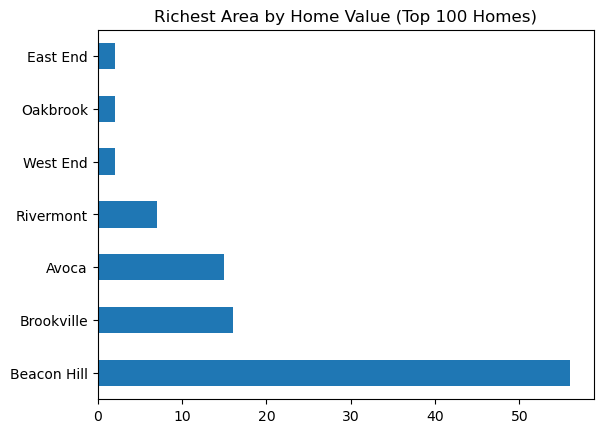

In [153]:
df_hun_most_expensive = df.nlargest(100, ['Price'])

ax = df_hun_most_expensive['Location'].value_counts().plot(kind="barh", title="Richest Area by Home Value (Top 100 Homes)")

<p>This Bar Graph shows that Beacon Hill had the highest number of homes in the Top 100 Most Expensive Homes list. Beacon Hill would be considered the wealthiest area of these locations. Beacon Hill is signficantly ahead of the second most location, so this reinforces that wealthy status.</p>